In [1]:
# import packages
import pandas as pd
import json
#from flat_table import normalize
import ast
import re
import math

import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [2]:
# load the package
df = pd.read_csv('/project/sample_final.csv')

ml_set = df[['abstract.text_sw','biblio.invention_title.text_sw','claims.claims_sw','yo2']]

## Training and Validation split

In [ ]:
# splitting data to training and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(ml_set, test_size=0.25, random_state = 42)

# train.to_csv("train_data.csv")
test.to_csv("test_data.csv")

In [3]:
# load training data
df = pd.read_csv('/project/train_data.csv')

In [4]:
# split train and test
y = df['yo2']
X = df.drop(columns = 'yo2')

In [5]:
# train and validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [6]:
X_train.shape

(56250, 4)

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# svm
algorithm = LinearSVC(class_weight='balanced',random_state=42)

# define paramater space
space = dict()
space['calibrated__base_estimator__C'] = [0.1, 1, 10, 100]

# choose number of folds
n_folds = 5

train_pipe = Pipeline([('pipe_tfidf', TfidfVectorizer()),
                ('calibrated', CalibratedClassifierCV(base_estimator=algorithm, cv=5))
                 ])

# perform hyperparameter tuning with randomised grid search, plus
# stratified cross validation
grid = GridSearchCV(estimator=train_pipe,
                  param_grid=space,
                  scoring="roc_auc",
                  n_jobs=-1,
                  cv=n_folds)

In [45]:
# SVM Model on ABSTRACT

# search for best hyperparameterisation
best_model_abs = grid.fit(X_train.iloc[:,0], y_train)

print('Best Hyperparameters: %s' % best_model_abs.best_params_)
print('Best AUC: %s' % best_model_abs.best_score_)

preds_abs = best_model_abs.predict(X_test.iloc[:,0])

print(classification_report(y_test,preds_abs))

Best Hyperparameters: {'calibrated__base_estimator__C': 0.1}
Best AUC: 0.862732439584445
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16977
           1       0.74      0.30      0.43      1773

    accuracy                           0.92     18750
   macro avg       0.83      0.65      0.70     18750
weighted avg       0.91      0.92      0.91     18750



In [184]:
# SVM model on TITLE

# search for best hyperparameterisation
best_model_title = grid.fit(X_train.iloc[:,1], y_train)

print('Best Hyperparameters: %s' % best_model_title.best_params_)
print('Best AUC: %s' % best_model_title.best_score_)

preds_title = best_model_title.predict(X_test.iloc[:,1])

print(classification_report(y_test,preds_title))

Best Hyperparameters: {'calibrated__base_estimator__C': 0.1}
Best AUC: 0.8619973132963967
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16916
           1       0.73      0.32      0.44      1834

    accuracy                           0.92     18750
   macro avg       0.83      0.65      0.70     18750
weighted avg       0.91      0.92      0.91     18750



In [185]:
# pd.DataFrame(preds_title[:,1]).hist(bins=50)

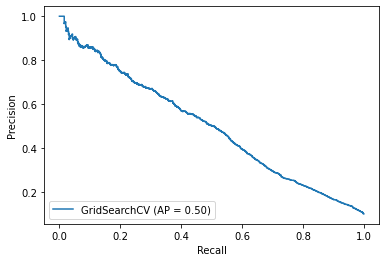

In [160]:
# precision and recall plot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
plot_precision_recall_curve(best_model_title, X_test.iloc[:,1], y_test)

In [151]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds_title)

array([[16704,   212],
       [ 1256,   578]])

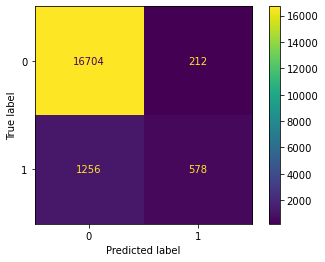

In [150]:
# confusion matrix plot
metrics.plot_confusion_matrix(best_model_title, X_test.iloc[:,1], y_test);

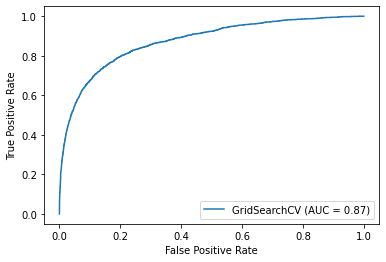

In [152]:
# Roc curve
metrics.plot_roc_curve(best_model_title, X_test.iloc[:,1], y_test)  

In [169]:
pd.DataFrame(preds_title).value_counts()

0    17960
1      790
dtype: int64

In [153]:
# SVM Model on CLAIMS

# search for best hyperparameterisation
best_model_claims = grid.fit(X_train.iloc[:,2], y_train)

print('Best Hyperparameters: %s' % best_model_claims.best_params_)
print('Best AUC: %s' % best_model_claims.best_score_)

preds_claims = best_model_claims.predict(X_test.iloc[:,2])

print(classification_report(y_test,preds_claims))

Best Hyperparameters: {'calibrated__base_estimator__C': 0.1}
Best AUC: 0.7895042673463909
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     16916
           1       0.76      0.20      0.32      1834

    accuracy                           0.92     18750
   macro avg       0.84      0.60      0.64     18750
weighted avg       0.90      0.92      0.89     18750



In [ ]:
# SVM Model abstract and claims

# search for best hyperparameterisation
best_model_abs_claims = grid.fit(X_train.iloc[:,0] + " " + X_train.iloc[:,2], y_train)

print('Best Hyperparameters: %s' % best_model_abs_claims.best_params_)
print('Best AUC: %s' % best_model_abs_claims.best_score_)

preds_abs_claims  = best_model_abs_claims.predict(X_test.iloc[:,0] + " " + X_test.iloc[:,2])

print(classification_report(y_test,preds_abs_claims))

In [ ]:
# SVM Model title and claims

# search for best hyperparameterisation
best_model_title_claims = grid.fit(X_train.iloc[:,1] + " " + X_train.iloc[:,2], y_train)

print('Best Hyperparameters: %s' % best_model_title_claims.best_params_)
print('Best AUC: %s' % best_model_title_claims.best_score_)

preds_title_claims = best_model_title_claims.predict(X_test.iloc[:,1] + " " + X_test.iloc[:,2])

print(classification_report(y_test,preds_title_claims))

In [ ]:
# SVM Model title and abstract

# search for best hyperparameterisation
best_model_title_abs = grid.fit(X_train.iloc[:,0] + " " + X_train.iloc[:,1], y_train)

print('Best Hyperparameters: %s' % best_model_title_abs.best_params_)
print('Best AUC: %s' % best_model_title_abs.best_score_)

preds_title_abs = best_model_title_abs.predict(X_test.iloc[:,0] + " " + X_test.iloc[:,1])

print(classification_report(y_test,preds_title_abs))

In [ ]:
# SVM Model title and abstract and claims

# search for best hyperparameterisation
best_model_tac = grid.fit(X_train.iloc[:,0] + " " + X_train.iloc[:,1] + " " + X_train.iloc[:,2], y_train)

print('Best Hyperparameters: %s' % best_model_tac.best_params_)
print('Best AUC: %s' % best_model_tac.best_score_)

preds_title_abs_claims = best_model_tac.predict(X_test.iloc[:,0] + " " + X_test.iloc[:,1]+ " " + X_test.iloc[:,2])

print(classification_report(y_test,preds_title_abs_claims))